# 第二组 - Bilibili数据分析
陈鹏 李雨欣 唐铭泽 杨贺翔 曹施敏


## Part 1 描述性分析
* 读入数据
* 对数据进行删重处理
* 绘制播放量和投币数统计图
* 计算投币转化率
* 用图表展示各视频分区投币率情况

## Part 2 回归分析
* Model 1 - 线性回归：标题长度、标签长度、弹幕数
* Model 2 - KNN预测投币率
* Model 3 - 综合评分的权重

## Part 3 爬取弹幕绘制词云
* 用爬虫获取b站5月榜单各分区排名第一的视频发布后一个月内的弹幕数据
* 根据弹幕数据中的词频绘制特定形状和颜色的词云
* 根据爬取的弹幕数据统计各分区各经典弹幕用语出现频率

## Part 4 游戏人物人脸识别
* 用爬虫获取英雄联盟网站上英雄的图像信息
* 识别输入图片与哪位英雄最相似

# Part 1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv("月榜单.csv")
data.head()

,Unnamed: 0,_id,排名,标题,作者,综合评分,视频分类,视频标签,播放量,弹幕数,评论,收藏,点赞数,投币数,分享数,up主性别,bilibili个人认证,up主粉丝总数,up主总观看数,up主总获赞数,up主视频数,主分类
0,0,5eba48a9537acd9e3a576b80,1,bilibili献给新一代的演讲《后浪》,哔哩哔哩弹幕网,23454532,日常,"何冰,正能量,后浪,五四,青年,年轻人,宣言片,演讲",23564316,220441,52332,825046,1494038,1451631,976070,男,哔哩哔哩弹幕网官方账号,2704115,260555030,26679821,86,全站
1,1,5eba48aa537acd9e3a576b81,2,【醒醒】中华儿女该起床了,冈部伦太郎·,18430769,日常,"罗翔,高考,郑强演讲,正能量,郑强,考研,学习,励志,燃爆,张三,后浪",6210329,77068,24224,734264,963476,876196,149756,保密,NaN,30685,6180099,969708,71,全站
2,2,5eba48ab537acd9e3a576b82,3,黑人抬棺原版视频,比划比划鬼畜网,14080543,搞笑,"万恶之源,鬼畜素材,黑人小哥,黑人,高能,魔性",37612110,320980,38813,766650,1253643,303053,651241,保密,NaN,113373,42111238,1395190,9,全站
3,3,5eba48ac537acd9e3a576b83,4,恭喜你发现宝藏,努力の巳宝宝,14047465,MAD·AMV,"MAD.AMV,天气之子,全能打卡挑战,AMV,极致画质,补帧,纯剪辑,新人向,催泪向,雨水...",4962163,19817,9050,547037,733656,609646,35062,女,NaN,80215,10732492,1283955,70,全站
4,4,5eba48ae537acd9e3a576b84,5,当你遭遇跟踪！快打开！,蓝书爱喝水,10462656,日常,"声优,求助,报警,警察,安全,小视频",2696705,7561,13312,452363,398885,211281,32220,男,NaN,108365,4946188,685294,46,全站


In [23]:
data.dtypes

Unnamed: 0       int64
_id             object
排名               int64
标题              object
作者              object
综合评分             int64
视频分类            object
视频标签            object
播放量              int64
弹幕数              int64
评论               int64
收藏               int64
点赞数              int64
投币数              int64
分享数              int64
up主性别           object
bilibili个人认证    object
up主粉丝总数          int64
up主总观看数          int64
up主总获赞数          int64
up主视频数           int64
主分类             object
dtype: object

In [24]:
data.nunique()

Unnamed: 0      1300
_id             1300
排名               100
标题              1200
作者              1155
综合评分            1201
视频分类              59
视频标签            1225
播放量             1300
弹幕数             1238
评论              1156
收藏              1282
点赞数             1293
投币数             1280
分享数             1255
up主性别              3
bilibili个人认证     158
up主粉丝总数         1277
up主总观看数         1157
up主总获赞数         1297
up主视频数            98
主分类               13
dtype: int64

#### 由于全站统计的前100名也包含在各分区的前100名内，为了避免重复，在以下分析中不考虑全站部分的数据

In [25]:
data_1=data.drop(data[data["主分类"]=="全站"].index)

In [26]:
data_1.head()

,Unnamed: 0,_id,排名,标题,作者,综合评分,视频分类,视频标签,播放量,弹幕数,评论,收藏,点赞数,投币数,分享数,up主性别,bilibili个人认证,up主粉丝总数,up主总观看数,up主总获赞数,up主视频数,主分类
100,100,5eba4960059f295f561ce90c,1,恭喜你发现宝藏,努力の巳宝宝,14047465,MAD·AMV,"MAD.AMV,天气之子,全能打卡挑战,AMV,极致画质,补帧,纯剪辑,新人向,催泪向,雨水...",4962217,19817,9050,547040,733664,609655,35062,女,NaN,80215,10732492,1283968,70,动画
101,101,5eba4961059f295f561ce90d,2,每天一遍 童年再见,优柔寡断胡英俊,7670824,特摄,"特摄,迪迦奥特曼,bilibili新星计划,奥特曼,毁童年,怀旧",10383479,52235,8413,261737,613548,248515,148948,保密,NaN,16921,10959944,644263,15,动画
102,102,5eba4962059f295f561ce90e,3,“更爱你的人”,始春廿肆,5846265,MAD·AMV,"MAD.AMV,MAD,新海诚,全能打卡挑战,声之形,剧情,治愈向",2572750,8137,4646,217585,297444,245647,15421,保密,NaN,18603,2589536,576619,6,动画
103,103,5eba4963059f295f561ce90f,4,【高燃 拟人】致敬“植物大战僵尸” 49种植物全员拟人！,想学画画的初慕,4609105,短片·手书·配音,"童年回忆杀,绘画,手书,植物大战僵尸,bilibili新星计划,拟人,PVZ,板绘,自制,童年",1681170,19955,6702,164007,236637,217840,22726,男,NaN,32984,2184293,293277,7,动画
104,104,5eba4965059f295f561ce910,5,从B站百大到暗杀名单 从造谣抹黑到无差别举报：全面起底网络黑公关【网络视频发展史：黑公关专题】,低调的帅爷,4076891,综合,"动漫杂谈,黑公关,互联网,LEX,MCN,吃瓜,网络,科普",2651915,26226,113373,137765,234469,171360,19879,男,bilibili 知名UP主、高能联盟成员,563223,18350626,1275714,87,动画


#### 选取播放量和投币数来分别代表视频的热度和up主的收益

In [27]:
data_bofangtoubi=data_1.groupby(["主分类"])["播放量","投币数"].sum()
data_bofangtoubi

<ipython-input-27-c71093ad20c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bofangtoubi=data_1.groupby(["主分类"])["播放量","投币数"].sum()


,播放量,投币数
主分类,,
动画,262166307,17339285
国创,76514532,2710394
娱乐,146559140,1773603
影视,197026631,8610814
数码,59442708,2284827
时尚,273780329,3924113
游戏,209198981,10580921
生活,358708154,14706433
科技,220231202,9375761


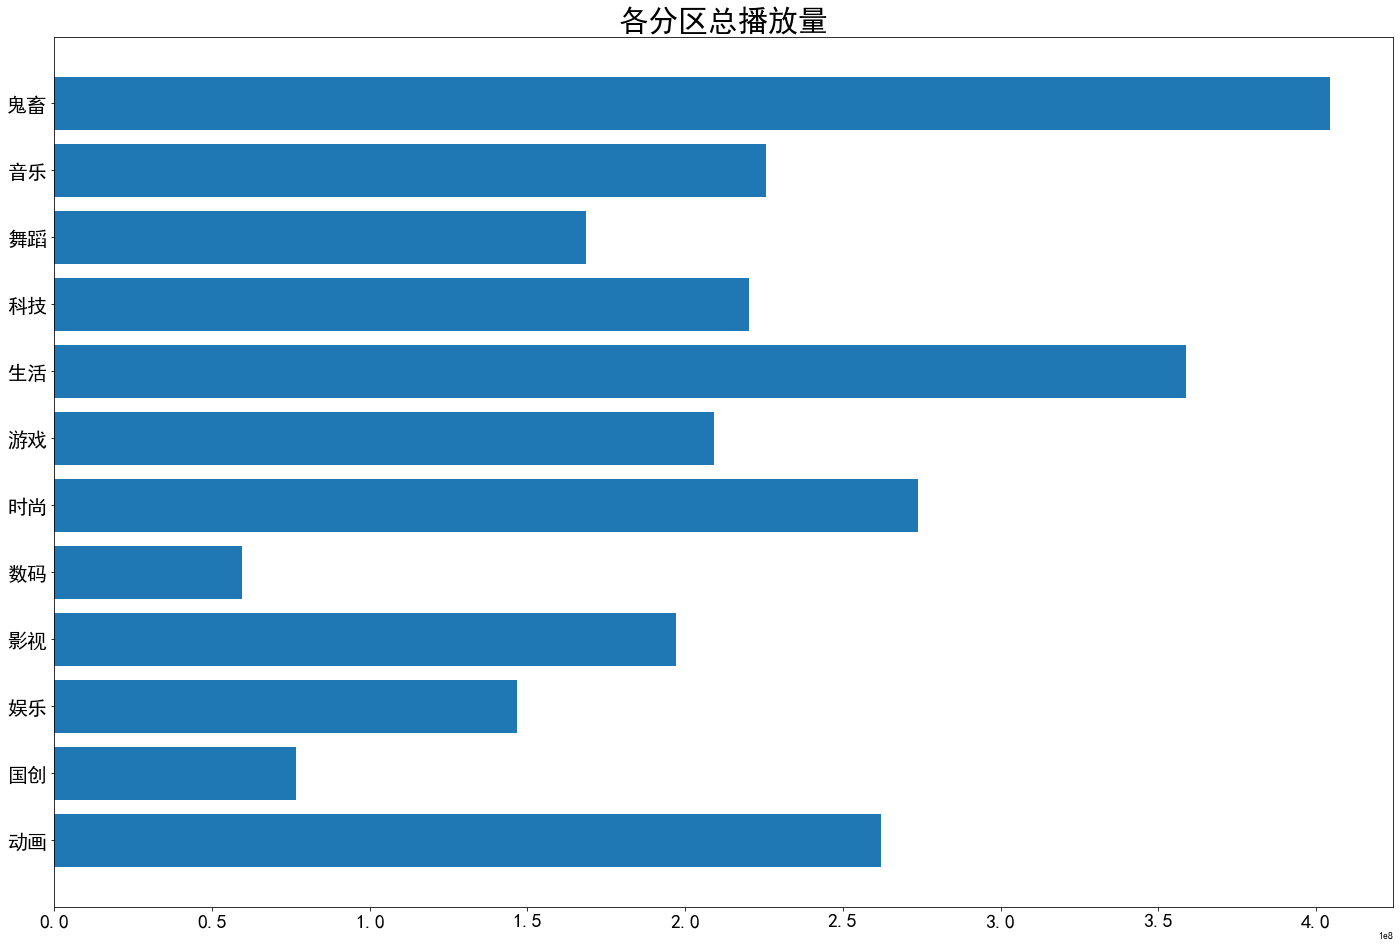

In [28]:
plt.figure(figsize = (24,16))
plt.rcParams['font.sans-serif']=['SimHei']
plt.barh(data_bofangtoubi.index,data_bofangtoubi["播放量"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("各分区总播放量",fontsize= 30)
plt.show()

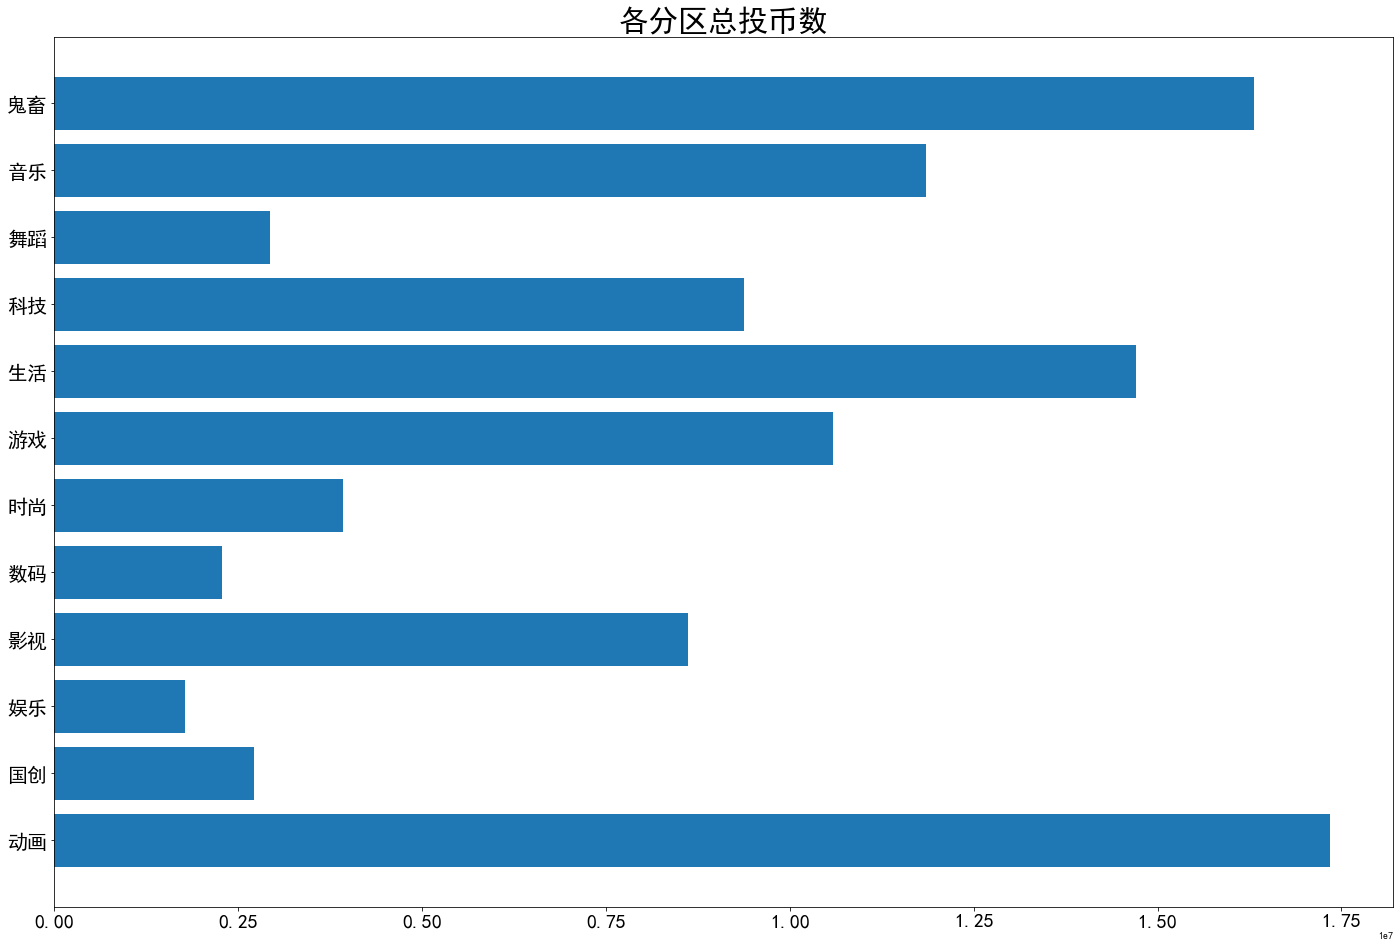

In [29]:
plt.figure(figsize = (24,16))
plt.rcParams['font.sans-serif']=['SimHei']
plt.barh(data_bofangtoubi.index,data_bofangtoubi["投币数"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("各分区总投币数",fontsize=30)
plt.show()

#### 鬼畜区的总播放量最多，而动画区的投币总数最多，引入转化率作为衡量视频热度转化为up主收益能力的高低

In [30]:
data_bofangtoubi["转化率"]=data_bofangtoubi["投币数"]/data_bofangtoubi["播放量"]
data_bofangtoubi

,播放量,投币数,转化率
主分类,,,
动画,262166307,17339285,0.066138
国创,76514532,2710394,0.035423
娱乐,146559140,1773603,0.012102
影视,197026631,8610814,0.043704
数码,59442708,2284827,0.038437
时尚,273780329,3924113,0.014333
游戏,209198981,10580921,0.050578
生活,358708154,14706433,0.040998
科技,220231202,9375761,0.042572


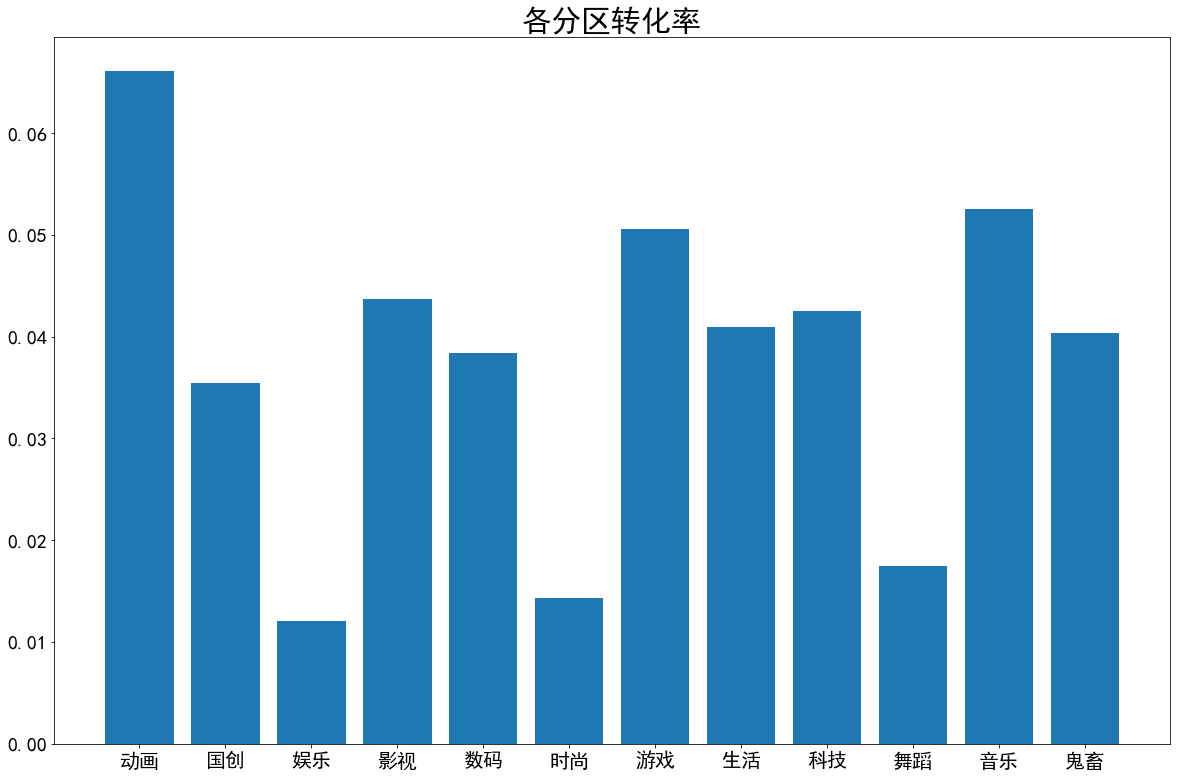

In [31]:
plt.figure(figsize = (20,13))
plt.rcParams['font.sans-serif']=['SimHei']
plt.bar(data_bofangtoubi.index,data_bofangtoubi["转化率"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("各分区转化率",fontsize=30)
plt.show()

# Part 2

In [14]:
import pandas as pd
import matplotlib
pd.set_option('display.max_columns', None)
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats
from collections import Counter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [32]:
bilibili = data
bilibili.head()

,Unnamed: 0,_id,排名,标题,作者,综合评分,视频分类,视频标签,播放量,弹幕数,评论,收藏,点赞数,投币数,分享数,up主性别,bilibili个人认证,up主粉丝总数,up主总观看数,up主总获赞数,up主视频数,主分类
0,0,5eba48a9537acd9e3a576b80,1,bilibili献给新一代的演讲《后浪》,哔哩哔哩弹幕网,23454532,日常,"何冰,正能量,后浪,五四,青年,年轻人,宣言片,演讲",23564316,220441,52332,825046,1494038,1451631,976070,男,哔哩哔哩弹幕网官方账号,2704115,260555030,26679821,86,全站
1,1,5eba48aa537acd9e3a576b81,2,【醒醒】中华儿女该起床了,冈部伦太郎·,18430769,日常,"罗翔,高考,郑强演讲,正能量,郑强,考研,学习,励志,燃爆,张三,后浪",6210329,77068,24224,734264,963476,876196,149756,保密,NaN,30685,6180099,969708,71,全站
2,2,5eba48ab537acd9e3a576b82,3,黑人抬棺原版视频,比划比划鬼畜网,14080543,搞笑,"万恶之源,鬼畜素材,黑人小哥,黑人,高能,魔性",37612110,320980,38813,766650,1253643,303053,651241,保密,NaN,113373,42111238,1395190,9,全站
3,3,5eba48ac537acd9e3a576b83,4,恭喜你发现宝藏,努力の巳宝宝,14047465,MAD·AMV,"MAD.AMV,天气之子,全能打卡挑战,AMV,极致画质,补帧,纯剪辑,新人向,催泪向,雨水...",4962163,19817,9050,547037,733656,609646,35062,女,NaN,80215,10732492,1283955,70,全站
4,4,5eba48ae537acd9e3a576b84,5,当你遭遇跟踪！快打开！,蓝书爱喝水,10462656,日常,"声优,求助,报警,警察,安全,小视频",2696705,7561,13312,452363,398885,211281,32220,男,NaN,108365,4946188,685294,46,全站


In [33]:
bilibili['投币率']=bilibili['投币数']/bilibili['播放量']
bilibili['标题长度']=bilibili['标题'].str.len()
bilibili['标签长度']=bilibili['视频标签'].str.len()

## Model 1 - 线性回归：标题长度、标签长度、弹幕数

In [34]:
bilibili_1=bilibili[[ '标题长度','标签长度','投币率', '弹幕数']]
bilibili_1.head()

,标题长度,标签长度,投币率,弹幕数
0,20,26,0.061603,220441
1,12,35,0.141087,77068
2,8,23,0.008057,320980
3,7,51,0.122859,19817
4,11,18,0.078348,7561


In [35]:
dataset1 = np.array(bilibili_1)
coins_rate = dataset1[:,2].reshape(-1,1)
title_len = dataset1[:,0].reshape(-1,1)
tag_len = dataset1[:,1].reshape(-1,1)
bullet = dataset1[:,3].reshape(-1,1)
print(title_len,tag_len,bullet,coins_rate,sep='\n')

[[20.]
 [12.]
 [ 8.]
 ...
 [30.]
 [24.]
 [23.]]
[[26.]
 [35.]
 [23.]
 ...
 [61.]
 [ 5.]
 [50.]]
[[220441.]
 [ 77068.]
 [320980.]
 ...
 [  3421.]
 [166122.]
 [  4130.]]
[[0.06160293]
 [0.14108689]
 [0.00805733]
 ...
 [0.08083784]
 [0.02243554]
 [0.04929422]]


In [36]:
y = bilibili_1['投币率']
X1 = bilibili_1.drop(columns='投币率')
X1 = sm.add_constant(X1)
reg1 = sm.OLS(y, X1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    投币率   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     17.25
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           5.48e-11
Time:                        17:14:19   Log-Likelihood:                 2293.6
No. Observations:                1300   AIC:                            -4579.
Df Residuals:                    1296   BIC:                            -4558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.004      7.993      0.0

In [37]:
regr = linear_model.LinearRegression()
regr.fit(bullet,coins_rate)
cr = regr.predict(coins_rate)
print('R squared: %.4f' % r2_score(coins_rate, cr))
regr = linear_model.LinearRegression()
regr.fit(title_len,coins_rate)
cr = regr.predict(coins_rate)
print('R squared: %.4f' % r2_score(coins_rate, cr))
regr = linear_model.LinearRegression()
regr.fit(tag_len,coins_rate)
cr = regr.predict(coins_rate)
print('R squared: %.4f' % r2_score(coins_rate, cr))

R squared: -0.0002
R squared: -0.0078
R squared: -0.2069


## Model 2 - KNN预测投币率

#### 计算出平均投币率

In [38]:
list_coins=bilibili['投币率']
avg_coins=np.mean(list_coins)
avg_coins

0.04420525782711427

#### 将投币率大于平均值的赋值1，小于的赋值0

In [39]:
bilibili['avg_coins']=bilibili['投币率']>avg_coins

In [40]:
list1=bilibili['视频标签']
list1

0                              何冰,正能量,后浪,五四,青年,年轻人,宣言片,演讲
1                     罗翔,高考,郑强演讲,正能量,郑强,考研,学习,励志,燃爆,张三,后浪
2                                 万恶之源,鬼畜素材,黑人小哥,黑人,高能,魔性
3       MAD.AMV,天气之子,全能打卡挑战,AMV,极致画质,补帧,纯剪辑,新人向,催泪向,雨水...
4                                      声优,求助,报警,警察,安全,小视频
                              ...                        
1295                  鬼畜,卢本伟,五五开,得得得,桃花朵朵开,赌怪,鬼畜调教,斗地主,搞笑
1296                             鬼畜,徐大虾,徐大虾咯,自制,花园宝宝,玛卡巴卡
1297    鬼畜,bilibili新星计划,人力VOCALOID,奥观海,特朗普川普,洗脑,特朗普,川建...
1298                                                鬼畜,小米
1299    鬼畜,蔡徐坤,岛市老八,黄绿合战5th-绿队应援,鬼畜调教,全明星,奥利给,巨魔,孙笑川,自...
Name: 视频标签, Length: 1300, dtype: object

#### 用逗号对标签进行拆分

In [41]:
list2=[]
for i in range(1,1300):
    list2.extend(list1[i].split(',',list1[i].count(',')))
list2[1:10]

['高考', '郑强演讲', '正能量', '郑强', '考研', '学习', '励志', '燃爆', '张三']

#### 在标签中挑选数量最多的5个

In [42]:
list3=Counter (list2)
list3.most_common(5)

[('搞笑', 227), ('全能打卡挑战', 142), ('鬼畜', 116), ('舞蹈', 112), ('数码', 105)]

#### 因为全能打卡挑战和bilibili新星计划为官方活动，我们将他们剔除。

In [43]:
list3.most_common(7)

[('搞笑', 227),
 ('全能打卡挑战', 142),
 ('鬼畜', 116),
 ('舞蹈', 112),
 ('数码', 105),
 ('bilibili新星计划', 90),
 ('明星', 81)]

In [44]:
list4=['搞笑','鬼畜','舞蹈','数码','明星']
list4

['搞笑', '鬼畜', '舞蹈', '数码', '明星']

In [45]:
bool_1=bilibili['视频标签'].str.contains('搞笑')
bilibili['搞笑']=bool_1
bool_2=bilibili['视频标签'].str.contains('鬼畜')
bilibili['鬼畜']=bool_2
bool_3=bilibili['视频标签'].str.contains('舞蹈')
bilibili['舞蹈']=bool_3
bool_4=bilibili['视频标签'].str.contains('数码')
bilibili['数码']=bool_4
bool_5=bilibili['视频标签'].str.contains('明星')
bilibili['明星']=bool_5
bilibili.head()

,Unnamed: 0,_id,排名,标题,作者,综合评分,视频分类,视频标签,播放量,弹幕数,评论,收藏,点赞数,投币数,分享数,up主性别,bilibili个人认证,up主粉丝总数,up主总观看数,up主总获赞数,up主视频数,主分类,投币率,标题长度,标签长度,avg_coins,搞笑,鬼畜,舞蹈,数码,明星
0,0,5eba48a9537acd9e3a576b80,1,bilibili献给新一代的演讲《后浪》,哔哩哔哩弹幕网,23454532,日常,"何冰,正能量,后浪,五四,青年,年轻人,宣言片,演讲",23564316,220441,52332,825046,1494038,1451631,976070,男,哔哩哔哩弹幕网官方账号,2704115,260555030,26679821,86,全站,0.061603,20,26,True,False,False,False,False,False
1,1,5eba48aa537acd9e3a576b81,2,【醒醒】中华儿女该起床了,冈部伦太郎·,18430769,日常,"罗翔,高考,郑强演讲,正能量,郑强,考研,学习,励志,燃爆,张三,后浪",6210329,77068,24224,734264,963476,876196,149756,保密,NaN,30685,6180099,969708,71,全站,0.141087,12,35,True,False,False,False,False,False
2,2,5eba48ab537acd9e3a576b82,3,黑人抬棺原版视频,比划比划鬼畜网,14080543,搞笑,"万恶之源,鬼畜素材,黑人小哥,黑人,高能,魔性",37612110,320980,38813,766650,1253643,303053,651241,保密,NaN,113373,42111238,1395190,9,全站,0.008057,8,23,False,False,True,False,False,False
3,3,5eba48ac537acd9e3a576b83,4,恭喜你发现宝藏,努力の巳宝宝,14047465,MAD·AMV,"MAD.AMV,天气之子,全能打卡挑战,AMV,极致画质,补帧,纯剪辑,新人向,催泪向,雨水...",4962163,19817,9050,547037,733656,609646,35062,女,NaN,80215,10732492,1283955,70,全站,0.122859,7,51,True,False,False,False,False,False
4,4,5eba48ae537acd9e3a576b84,5,当你遭遇跟踪！快打开！,蓝书爱喝水,10462656,日常,"声优,求助,报警,警察,安全,小视频",2696705,7561,13312,452363,398885,211281,32220,男,NaN,108365,4946188,685294,46,全站,0.078348,11,18,True,False,False,False,False,False


#### 将布尔值转化为01变量

In [46]:
bilibili['搞笑']=bilibili['搞笑']+0
bilibili['鬼畜']=bilibili['鬼畜']+0
bilibili['舞蹈']=bilibili['舞蹈']+0
bilibili['数码']=bilibili['数码']+0
bilibili['明星']=bilibili['明星']+0
bilibili['avg_coins']=bilibili['avg_coins']+0
bilibili_tag=bilibili[['avg_coins','搞笑','鬼畜','舞蹈','数码','明星']]
bilibili_tag

,avg_coins,搞笑,鬼畜,舞蹈,数码,明星
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1295,1,1,1,0,0,0
1296,0,0,1,0,0,0
1297,1,0,1,0,0,0
1298,0,0,1,0,0,0


In [47]:
tag_reg = np.array(bilibili_tag)
X = tag_reg[:,1:]
y = tag_reg[:,0]

print(X)
print(y)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 1]]
[1 1 0 ... 1 0 1]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(975, 5)
(325, 5)


In [49]:
X_trainval = X_train
y_trainval = y_train
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,test_size=0.33)
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
    
print("Best validation accuracy: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("Best number of neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

knn.fit(X_trainval, y_trainval)
print("Test-set accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Best validation accuracy: 0.559
Best number of neighbors: 7
Test-set accuracy: 0.582


In [50]:
cross_val_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=6)
    cross_val_scores.append(np.mean(scores))
    
    
print("Best cross-validation accuracy: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("Best number of neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("Test-set score: {:.3f}".format(knn.score(X_test, y_test)))

Best cross-validation accuracy: 0.590
Best number of neighbors: 13
Test-set score: 0.578


## Model 3 - 综合评分的权重

In [68]:
bilibili_2=bilibili[[ '播放量','弹幕数','评论', '收藏','投币数', '分享数','综合评分']]
y2 = bilibili_2['综合评分']

X2 = bilibili_2.drop(columns='综合评分')
X2 = sm.add_constant(X2)
reg1 = sm.OLS(y2, X2).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   综合评分   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          9.75e-113
Time:                        17:46:31   Log-Likelihood:                -20416.
No. Observations:                1300   AIC:                         4.085e+04
Df Residuals:                    1293   BIC:                         4.088e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.311e+06   5.31e+04     24.697      0.0

#### 我们可以得出，综合评分受评论、收藏、点赞和分享的影响最高，但与投币数却成负相关，根据常识，我们认为投币数与综合评分应该是无关的。

# Part 3

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from tqdm import trange

## Bilibili献给新一代的演讲《后浪》

In [53]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=186803402&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "finger=158939783; buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; sid=5vwu8h9c; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; PVID=6; bfe_id=fdfaf33a01b88dd4692ca80f00c2de7f" #Headers中copy即可
               }

    file = open("bilibili_danmu_shenghuo.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '5/03/2020' #设置爬取弹幕的起始日
    end = '6/03/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 32/32 [01:48<00:00,  3.40s/it]

弹幕爬取完成


## 【何同学】我用一万行备忘录做了个动画...

In [54]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=187831922&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=fdfaf33a01b88dd4692ca80f00c2de7f" #Headers中copy即可
               }

    file = open("bilibili_danmu_shuma.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '5/06/2020' #设置爬取弹幕的起始日
    end = '6/06/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 32/32 [01:47<00:00,  3.36s/it]

弹幕爬取完成


## 恭喜你发现宝藏

In [55]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=178453977&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=1e33d9ad1cb29251013800c68af42315" #Headers中copy即可
               }

    file = open("bilibili_danmu_donghua.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/12/2020' #设置爬取弹幕的起始日
    end = '5/12/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:43<00:00,  3.34s/it]

弹幕爬取完成


## 川 粤 火 线 ！ 

In [56]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=183698314&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=fdfaf33a01b88dd4692ca80f00c2de7f" #Headers中copy即可
               }

    file = open("bilibili_danmu_guochuang.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/20/2020' #设置爬取弹幕的起始日
    end = '5/20/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:41<00:00,  3.29s/it]

弹幕爬取完成


## 川建国“深得民心”

In [57]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=175017843&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=fdfaf33a01b88dd4692ca80f00c2de7f" #Headers中copy即可
               }

    file = open("bilibili_danmu_yule.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/07/2020' #设置爬取弹幕的起始日
    end = '5/07/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:41<00:00,  3.27s/it]

弹幕爬取完成


## 龙

In [61]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=178337341&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; bfe_id=1e33d9ad1cb29251013800c68af42315; PVID=2" #Headers中copy即可
               }

    file = open("bilibili_danmu_yingshi.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/15/2020' #设置爬取弹幕的起始日
    end = '5/15/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:42<00:00,  3.32s/it]

弹幕爬取完成


## 解决男生「雌化」尴尬，脂肪胸变胸肌！家中可练，不需场地器械。

In [62]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=178120657&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; bfe_id=1e33d9ad1cb29251013800c68af42315; PVID=1" #Headers中copy即可
               }

    file = open("bilibili_danmu_shishang.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/14/2020' #设置爬取弹幕的起始日
    end = '5/14/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:43<00:00,  3.34s/it]

弹幕爬取完成


## 花了一万多元终于见到最早开放世界游戏之一

In [63]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=185162869&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=5db70a86bd1cbe8a88817507134f7bb5" #Headers中copy即可
               }

    file = open("bilibili_danmu_youxi.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '5/01/2020' #设置爬取弹幕的起始日
    end = '6/01/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 32/32 [01:48<00:00,  3.40s/it]

弹幕爬取完成


## 【才浅手工】为什么这把折扇做了40天？用过于硬核的制作方式打造一把暗藏玄机的红蝶折扇

In [64]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=176948058&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1" #Headers中copy即可
               }

    file = open("bilibili_danmu_keji.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/12/2020' #设置爬取弹幕的起始日
    end = '5/12/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:46<00:00,  3.44s/it]

弹幕爬取完成


## 为偶像做过最疯狂的事……yesok！一起绽放！

In [65]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=182006754&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=1; bfe_id=1e33d9ad1cb29251013800c68af42315" #Headers中copy即可
               }

    file = open("bilibili_danmu_wudao.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/23/2020' #设置爬取弹幕的起始日
    end = '5/23/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:44<00:00,  3.36s/it]

弹幕爬取完成


## 最强尴尬王！！！！！！

In [66]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=185300717&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; bfe_id=1e33d9ad1cb29251013800c68af42315; PVID=2" #Headers中copy即可
               }

    file = open("bilibili_danmu_yinyue.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '5/01/2020' #设置爬取弹幕的起始日
    end = '6/01/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 32/32 [01:47<00:00,  3.36s/it]

弹幕爬取完成


## 【黑人抬棺】车头一翘，_________

In [59]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=177359979&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=3; bfe_id=018fcd81e698bbc7e0648e86bdc49e09" #Headers中copy即可
               }

    file = open("bilibili_danmu_guichu.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '4/12/2020' #设置爬取弹幕的起始日
    end = '5/12/2020' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:42<00:00,  3.30s/it]

弹幕爬取完成


## 英雄联盟

In [60]:
def get_bilibili_url(start, end):
    url_list = []
    date_list = [i for i in pd.date_range(start, end).strftime('%Y-%m-%d')]
    for date in date_list:
        url = f"https://api.bilibili.com/x/v2/dm/history?type=1&oid=61671548&date={date}"
        url_list.append(url)
    return url_list

def get_bilibili_danmu(url_list):
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36",
        "cookie": "buvid3=EC249F3B-0501-8D57-55E5-9111E20F59F044814infoc; CURRENT_FNVAL=80; _uuid=401F7929-0968-7767-5E48-43FE14D0F55A46310infoc; blackside_state=1; rpdid=|(u~||YY|Rk)0J'uY|lY)lJJJ; DedeUserID=299425856; DedeUserID__ckMd5=0936b587311f205e; SESSDATA=cb0dfa2f%2C1621260967%2C3c4f3*b1; bili_jct=2f53e66da32aadd34ed93b27166754ab; sid=bf5zfckm; PVID=3; bfe_id=1e33d9ad1cb29251013800c68af42315; bsource=share_source_copy_link" #Headers中copy即可
               }

    file = open("bilibili_danmu_lol.txt", 'w',encoding='utf-8')
    for i in trange(len(url_list)):
        url = url_list[i]
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text)
        data = soup.find_all("d")
        danmu = [data[i].text for i in range(len(data))]
        for items in danmu:
            file.write(items)
            file.write("\n")
        time.sleep(3)
    file.close()


if __name__ == "__main__":
    start = '11/3/2018' #设置爬取弹幕的起始日
    end = '12/3/2018' #设置爬取弹幕的终止日
    url_list = get_bilibili_url(start, end)
    get_bilibili_danmu(url_list)
    print("弹幕爬取完成")

100%|██████████| 31/31 [01:42<00:00,  3.31s/it]

弹幕爬取完成


## 绘制词云

In [69]:
import pandas as pd
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import time
import re
import requests

In [70]:
!pip install wordcloud

In [71]:
from wordcloud import WordCloud 

In [72]:
import jieba
import imageio
import wordcloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

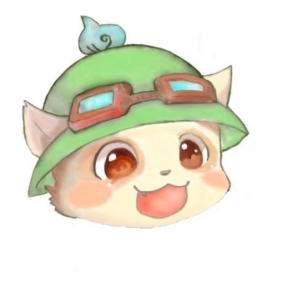

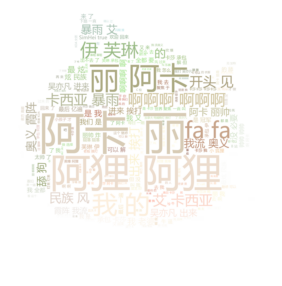

In [91]:

# 读取txt文本
with open('bilibili_danmu_lol.txt','r',encoding='utf-8') as f:
    text = f.read()

# 简单处理文本，删除空格等多余字符
text = text.replace(' ','').replace('\t','').replace('\n','')
# 使用jieba分隔词语
wordlist = jieba.lcut(text)   # ['aa','bb','cc'...]
# print(wordlist)
# 用空格连接各个词语，又形成一个大字符串
string = ' '.join(wordlist)   # 'aa bb cc'

# 读取图片
im = imageio.imread('timo2.jpg')
im_coloring = np.array(Image.open(r"C:\Users\Helena\Desktop\研一上\课程\python课件\大作业pre\timo2.jpg"))
image_colors = ImageColorGenerator(im_coloring)

# 生成词云图片
# 先实例化一个词云对象
wc = wordcloud.WordCloud(width=im.shape[0],  # 词云图宽度同原图片宽度
                        height=im.shape[1],
                        background_color='white',  # 背景颜色白色
                        font_path='msyh.ttc',  # 指定字体路径，微软雅黑，可从win自带的字体库中找
                        mask=im,   # mask 指定词云形状图片，默认为矩形
                        scale=5)   # 默认为1，越大越清晰
# 再给词云输入文字
wc.generate(string)
# 保存成文件
wc.to_file('word_cloud_timofinal.png')

plt.figure(figsize=(5,5))
plt.imshow(im_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(5,5))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

## 统计各分区经典弹幕出现频率

In [77]:
import os
from pathlib import Path
import pandas as pd

In [78]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [79]:
current_directory = Path.cwd()
current_directory

WindowsPath('C:/Users/Helena/Desktop/研一上/课程/python课件/大作业pre')

In [80]:
folder_弹幕 = current_directory/'弹幕'
folder_弹幕

WindowsPath('C:/Users/Helena/Desktop/研一上/课程/python课件/大作业pre/弹幕')

In [81]:
files_弹幕 = os.listdir(folder_弹幕)
files_弹幕

['bilibili_danmu_动画.txt',
 'bilibili_danmu_国创.txt',
 'bilibili_danmu_娱乐.txt',
 'bilibili_danmu_影视.txt',
 'bilibili_danmu_数码.txt',
 'bilibili_danmu_时尚.txt',
 'bilibili_danmu_游戏.txt',
 'bilibili_danmu_生活.txt',
 'bilibili_danmu_科技.txt',
 'bilibili_danmu_舞蹈.txt',
 'bilibili_danmu_音乐.txt',
 'bilibili_danmu_鬼畜.txt']

In [82]:
df_弹幕 = pd.DataFrame(files_弹幕, columns = ['file_name'])
df_弹幕.head(13)

,file_name
0,bilibili_danmu_动画.txt
1,bilibili_danmu_国创.txt
2,bilibili_danmu_娱乐.txt
3,bilibili_danmu_影视.txt
4,bilibili_danmu_数码.txt
5,bilibili_danmu_时尚.txt
6,bilibili_danmu_游戏.txt
7,bilibili_danmu_生活.txt
8,bilibili_danmu_科技.txt
9,bilibili_danmu_舞蹈.txt


In [83]:
x = []
y = []
for i in range(12):
    location = folder_弹幕.__str__() + '/' + df_弹幕.iloc[i,0]
    location=location.replace('\\','/')
    x.append(df_弹幕.iloc[i,0].split('_')[2].split('.')[0])
    with open(location,'r',encoding='utf-8') as f:
        text = f.read()
    word_count = text.count('下次一定')
    y.append(word_count) 

In [84]:
import matplotlib.pyplot as plt
from matplotlib import  font_manager

In [85]:
my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\simfang.ttf")
my_font2=font_manager.FontProperties(fname="C:\Windows\Fonts\simhei.ttf")

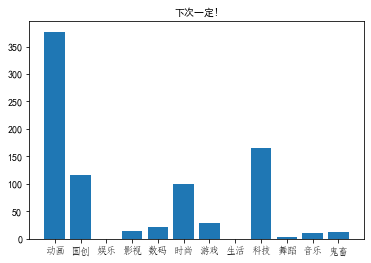

In [86]:
plt.bar(x,y)
plt.title('下次一定!',fontproperties=my_font2)
labels = x
plt.xticks(x, labels, fontproperties=my_font)
plt.show()

In [87]:
x = []
y = []
for i in range(12):
    location = folder_弹幕.__str__() + '/' + df_弹幕.iloc[i,0]
    location=location.replace('\\','/')
    x.append(df_弹幕.iloc[i,0].split('_')[2].split('.')[0])
    with open(location,'r',encoding='utf-8') as f:
        text = f.read()
    word_count = text.count('开头见')
    y.append(word_count) 

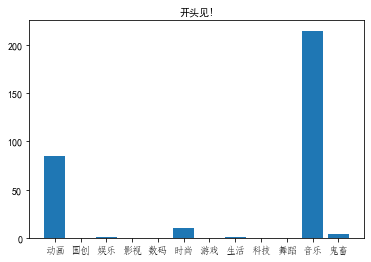

In [88]:
plt.bar(x,y)
plt.title('开头见!',fontproperties=my_font2)
labels = x
plt.xticks(x, labels, fontproperties=my_font)
plt.show()

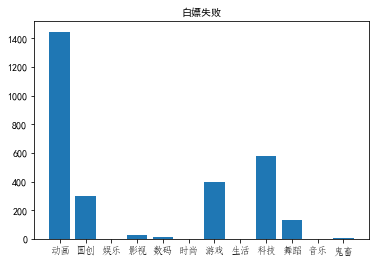

In [89]:
x = []
y = []
for i in range(12):
    location = folder_弹幕.__str__() + '/' + df_弹幕.iloc[i,0]
    location=location.replace('\\','/')
    x.append(df_弹幕.iloc[i,0].split('_')[2].split('.')[0])
    with open(location,'r',encoding='utf-8') as f:
        text = f.read()
    word_count = text.count('白嫖失败')
    y.append(word_count) 
    
plt.bar(x,y)
plt.title('白嫖失败',fontproperties=my_font2)
labels = x
plt.xticks(x, labels, fontproperties=my_font)
plt.show()

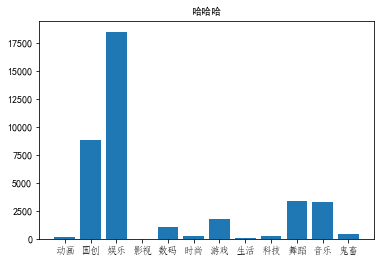

In [90]:
x = []
y = []
for i in range(12):
    location = folder_弹幕.__str__() + '/' + df_弹幕.iloc[i,0]
    location=location.replace('\\','/')
    x.append(df_弹幕.iloc[i,0].split('_')[2].split('.')[0])
    with open(location,'r',encoding='utf-8') as f:
        text = f.read()
    word_count = text.count('哈哈哈')
    y.append(word_count) 
    
plt.bar(x,y)
plt.title('哈哈哈',fontproperties=my_font2)
labels = x
plt.xticks(x, labels, fontproperties=my_font)
plt.show()

# Part 4

In [ ]:
import re
from urllib.request import urlopen
import os.path
import sys
from PyQt4.QtWebKit import *
from PyQt4.QtGui import *
from PyQt4.QtCore import *


class Render(QWebPage):  # 用来渲染网页,将url中的所有信息加载下来并存到一个新的框架中
    def __init__(self,url):
        self.app = QApplication(sys.argv)
        QWebPage.__init__(self)
        self.loadFinished.connect(self._loadFinished)
        self.mainFrame().load(QUrl(url))
        self.app.exec_()
    def _loadFinished(self, result):
        self.frame = self.mainFrame()
        self.app.quit()


#创建images文件夹
images_dir = 'heros/'
if not os.path.exists(images_dir):
    os.mkdir(images_dir)

url = 'https://lol.qq.com/data/info-heros.shtml#Navi'
r = Render(url)

#得到经过渲染的网页
html = r.frame.toHtml()


#截取主体部分
body_search = re.search(r'<ul id="jSearchHeroDiv" class="imgtextlist">([\s\S]+?)</ul>.*?',html)
body = body_search.group(1)

#获取图片链接和对应英雄名
hero = re.findall(r'<img src="(.*?)" alt="(.*?)\s(.*?)">.*?',body)


#写入图片
for i in hero:
    name = i[1] + '_' + i[2]
    print("正在下载"+name)
    image = urlopen('http:' + i[0])
    with open('heros/'+name+'.jpg','wb') as f:
        f.write(image.read())

print("----下载完成----")

In [1]:
import os,dlib,glob,numpy
from skimage import io
 
# 人脸关键点检测器
predictor_path = "shape_predictor_68_face_landmarks.dat"
# 人脸识别模型、提取特征值
face_rec_model_path = "dlib_face_recognition_resnet_model_v1.dat"
# 训练图像文件夹
faces_folder_path ='heros' 
# 加载模型
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

In [2]:
candidate = []         # 存放训练集人物名字
descriptors = []       #存放训练集人物特征列表 
for f in glob.glob(os.path.join(faces_folder_path,"*.jpg")):
    print("正在处理: {}".format(f))
    img = io.imread(f)
    #candidate.append(f.split('\\')[-1].split('.')[0])
    # 人脸检测
    dets = detector(img, 1)
    #print(dets)
    #print(k,d,enumerate(dets))
    for k, d in enumerate(dets): 
        #print(k,d)
        print('------')
        candidate.append(f.split('\\')[-1].split('.')[0])
        shape = sp(img, d)
        # 提取特征
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        v = numpy.array(face_descriptor) 
        descriptors.append(v)
print('识别训练完毕！')

正在处理: heros\万花通灵_妮蔻.jpg
正在处理: heros\不屈之枪_潘森.jpg
正在处理: heros\不灭狂雷_沃利贝尔.jpg
正在处理: heros\不祥之刃_卡特琳娜.jpg
正在处理: heros\九尾妖狐_阿狸.jpg
正在处理: heros\亡灵战神_赛恩.jpg
正在处理: heros\仙灵女巫_璐璐.jpg
正在处理: heros\众星之子_索拉卡.jpg
0 [(21, 30) (96, 105)]
------
正在处理: heros\傲之追猎者_雷恩加尔.jpg
正在处理: heros\元素女皇_奇亚娜.jpg
0 [(17, 39) (80, 101)]
------
正在处理: heros\光辉女郎_拉克丝.jpg
正在处理: heros\兽灵行者_乌迪尔.jpg
正在处理: heros\冰晶凤凰_艾尼维亚.jpg
正在处理: heros\冰霜女巫_丽桑卓.jpg
正在处理: heros\刀锋之影_泰隆.jpg
正在处理: heros\刀锋舞者_艾瑞莉娅.jpg
0 [(21, 30) (96, 105)]
------
正在处理: heros\北地之怒_瑟庄妮.jpg
正在处理: heros\卡牌大师_崔斯特.jpg
正在处理: heros\发条魔灵_奥莉安娜.jpg
0 [(5, 30) (79, 105)]
------
正在处理: heros\含羞蓓蕾_莉莉娅.jpg
0 [(45, 32) (107, 94)]
------
正在处理: heros\唤潮鲛姬_娜美.jpg
正在处理: heros\圣枪游侠_卢锡安.jpg
正在处理: heros\圣锤之毅_波比.jpg
正在处理: heros\堕落天使_莫甘娜.jpg
0 [(13, 30) (88, 105)]
------
正在处理: heros\复仇之矛_卡莉丝塔.jpg
正在处理: heros\复仇焰魂_布兰德.jpg
正在处理: heros\大发明家_黑默丁格.jpg
正在处理: heros\天启者_卡尔玛.jpg
正在处理: heros\寒冰射手_艾希.jpg
正在处理: heros\封魔剑魂_永恩.jpg
正在处理: heros\山隐之焰_奥恩.jpg
正在处理: heros\岩雀_塔莉垭.jpg
0 [(21, 30) (96, 105)]
---

正在处理: heros\生化魔人_扎克.jpg
正在处理: heros\疾风剑豪_亚索.jpg
正在处理: heros\痛苦之拥_伊芙琳.jpg
正在处理: heros\瘟疫之源_图奇.jpg
正在处理: heros\皎月女神_黛安娜.jpg
正在处理: heros\皮城女警_凯特琳.jpg
正在处理: heros\皮城执法官_蔚.jpg
0 [(31, 46) (93, 108)]
------
正在处理: heros\盲僧_李青.jpg
正在处理: heros\祖安怒兽_沃里克.jpg
正在处理: heros\祖安狂人_蒙多医生.jpg
正在处理: heros\离群之刺_阿卡丽.jpg
正在处理: heros\符文法师_瑞兹.jpg
正在处理: heros\翠神_艾翁.jpg
正在处理: heros\腕豪_瑟提.jpg
正在处理: heros\英勇投弹手_库奇.jpg
正在处理: heros\荆棘之兴_婕拉.jpg
0 [(31, 44) (83, 95)]
------
正在处理: heros\荒漠屠夫_雷克顿.jpg
正在处理: heros\荣耀行刑官_德莱文.jpg
正在处理: heros\蒸汽机器人_布里茨.jpg
正在处理: heros\虚空之女_卡莎.jpg
0 [(6, 17) (96, 106)]
------
正在处理: heros\虚空之眼_维克兹.jpg
正在处理: heros\虚空先知_玛尔扎哈.jpg
正在处理: heros\虚空恐惧_科加斯.jpg
正在处理: heros\虚空掠夺者_卡兹克.jpg
正在处理: heros\虚空行者_卡萨丁.jpg
正在处理: heros\虚空遁地兽_雷克塞.jpg
正在处理: heros\蛮族之王_泰达米尔.jpg
正在处理: heros\蜘蛛女皇_伊莉丝.jpg
0 [(37, 44) (89, 95)]
------
正在处理: heros\血港鬼影_派克.jpg
正在处理: heros\解脱者_塞拉斯.jpg
正在处理: heros\诡术妖姬_乐芙兰.jpg
0 [(45, 32) (107, 94)]
------
正在处理: heros\诺克萨斯之手_德莱厄斯.jpg
0 [(6, 17) (96, 106)]
------
正在处理: heros\诺克萨斯统领_斯维因.jpg
0 [(-

In [3]:
import numpy as np
print(np.array(descriptors).shape)

(29, 128)


In [4]:
candidate 
print(np.array(candidate).shape)

(29,)


In [5]:
test_path='haolian'
try:
    img = io.imread(r'金克丝.jpg')
    #print(img)
    dets = detector(img, 1)
    #print(dets)
except:
    print('输入路径有误，请检查！')

[[[0 0 5]
  [0 0 5]
  [0 0 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 5]
  [0 0 5]
  [0 0 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 5]
  [0 0 5]
  [0 0 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 2 8]
  [2 1 8]
  [0 0 8]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 1 8]
  [2 1 8]
  [0 0 8]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 8]
  [0 0 8]
  [0 0 8]]]


In [6]:
dist = []
print('---')
for k, d in enumerate(dets):
    print('---')
    print(k,d)
    print('---')
    shape = sp(img, d)
    print(shape)
    face_descriptor = facerec.compute_face_descriptor(img, shape)
    d_test = numpy.array(face_descriptor) 
    for i in descriptors:                #计算距离
        dist_ = numpy.linalg.norm(i-d_test)
        dist.append(dist_)

---
---
0 [(21, 22) (96, 96)]
---


识别到的人物最有可能是:  暴走萝莉_金克丝


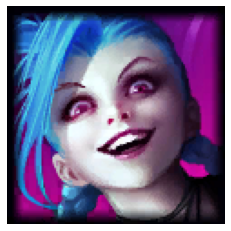

In [7]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
from pathlib import Path
cwd = Path.cwd()
# 训练集人物和距离组成一个字典
c_d = dict(zip(candidate,dist))                
cd_sorted = sorted(c_d.items(), key=lambda d:d[1])
cd_sorted
print ("识别到的人物最有可能是: ",cd_sorted[0][0])
lena = mpimg.imread(cwd/'heros'/'{}.jpg'.format(cd_sorted[0][0]))
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()